<center> <h1 style="color:blue"> Projet analyse en Composantes Principales </h1></center>

<center> <h2> <b>RAZAFINJATOVO </b> <i>Tolojanahary Elysé</i>  </h2></center>

<u><h4> 1) Introduction: </h4></u>

Voici mon projet d’analyse de données portant sur l’étude morphologique de graines de citrouille, en utilisant le Pumpkin Seeds Dataset. Ce jeu de données contient plusieurs variables quantitatives décrivant la forme, la taille et les caractéristiques géométriques de différentes variétés de graines.

L’objectif principal de cette projet est d’explorer la structure des données à travers une Analyse en Composantes Principales (ACP). Cette méthode permet de réduire la dimensionnalité tout en conservant l’essentiel de l’information. Elle facilite également la visualisation et la détection de regroupements ou de similarités entre les différentes graines.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

<h4> <u> 2) Importation de jeu de donnée </u> </h4>

In [37]:
datasets = pd.read_excel('../../dataset/Seeds_Dataset.xlsx', sheet_name='Pumpkin_Seeds_Dataset')

<h4><u> 3) Dimention de donnée: </u></h4>

In [38]:
dim = datasets.shape
print(f'Le dataset contient {dim[0]} échantillons et {dim[1]} caractéristiques.')

Le dataset contient 2500 échantillons et 13 caractéristiques.


<h4><u> 4) Information pour chaque variables: </u> </h4>

In [39]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


<h4><u> 5)  Description statistique des variables: </u></h4>

In [40]:
datasets.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


<h4> <u> 6) 10 premières lignes du donnée </u> </h4>

In [41]:
datasets.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Çerçevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Çerçevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Çerçevelik


#### 7) A propos de donnée:
Notre donnée contient 2500 lignes et 13 colonnes,dont les colonnes sont:
- ``Area`` :	Surface de la graine (en pixels²),
- ``Perimeter``:	Périmètre de la graine ,
- ``Equiv_Diameter`` : diamètre d’un cercle ayant la même surface que l’objet mesuré (la graine)
- ``Major_Axis_Length``:	Longueur de l’axe principal (longueur maximale) 
- ``Minor_Axis_Length``:	Longueur de l’axe secondaire (largeur)
- ``Eccentricity``:	Rapport entre les deux axes (forme)
- ``Convex_Area``:	Surface du plus petit polygone convexe qui contient la graine
- ``Extent``:	Ratio entre surface réelle et surface englobante (bounding box)
- ``Solidity``:	Rapport surface réelle / surface convexe
- ``Roundness``:	Indice de circularité
- ``Aspect_Ration``:	Ratio longueur / largeur
- ``Compactness``:	Compacité 
- ``Class``:	Type de graine de courge (ex : 'Çerçevelik', 'Ürgüp Sivrisi')

<h4> <u> 8) EDA :Analyse Exploratoire de Donnée: </u></h4>

<u> - Matrice de corélation </u>

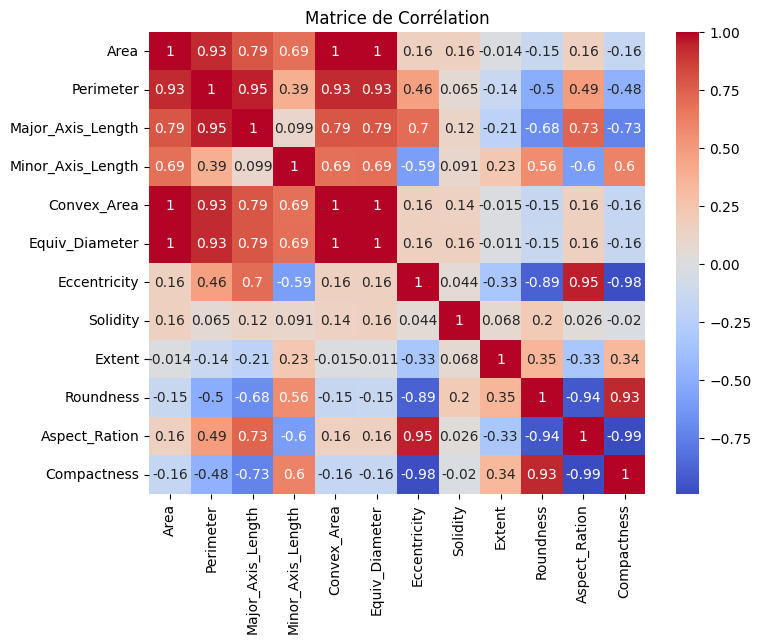

In [42]:
# Matrice de corrélation:pour visualiser les relations entre les variables
plt.figure(figsize=(8, 6))
sns.heatmap(datasets.drop(['Class'],axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

<u> -Visualisation par scatterplot </u>

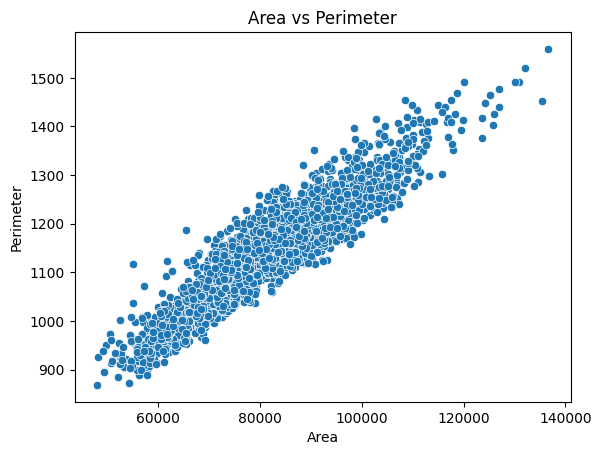

In [43]:
sns.scatterplot(x='Area', y='Perimeter', data=datasets)
plt.title('Area vs Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

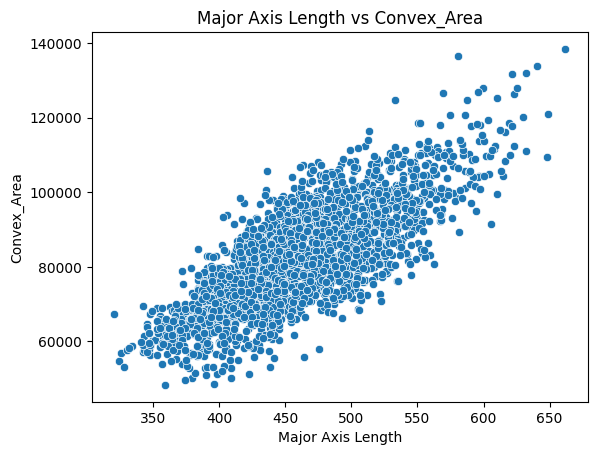

In [44]:
sns.scatterplot(x='Major_Axis_Length', y='Convex_Area', data=datasets)
plt.title('Major Axis Length vs Convex_Area')         
plt.xlabel('Major Axis Length')
plt.ylabel('Convex_Area')
plt.show()



### Interpretation:
- On trouve d'après le representation précedent que la plus part des variables sont corelés,
- il y des corelation positif (par exemples le variable Major Axis Length et Convex_Area)
- il y a aussi des corelation negatif (par example les variable Compactness et Aspect_Ration)

####  Tous les variables

In [45]:
colonnes = list(datasets.columns)
colonnes

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Convex_Area',
 'Equiv_Diameter',
 'Eccentricity',
 'Solidity',
 'Extent',
 'Roundness',
 'Aspect_Ration',
 'Compactness',
 'Class']

<h4><u> 9) Normalisation de donnée : </u></h4>


Pour mettre toutes les variables sur une même échelle, pour qu’aucune variable ne domine les autres à cause de son unité ou de son ordre de grandeur.

- Ici je prefère utiliser la normalisation Min-Max pour metre tous les valeur entre 0 et 1 :
 $ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $

In [46]:
# Fontion pour normaliser les données
# Normalisation Min-Max

def normalize_data(data,column):
    min_val = data[column].min()
    max_val = data[column].max()
    data[column] = (data[column] - min_val) / (max_val - min_val)
    

<h4><u> 10 ) Nouveau donnée après normatisation: </u></h4>

In [47]:
# Normalisation de donnée :
# Pour mettre toutes les variables sur une même échelle, pour qu’aucune variable ne domine les autres à cause de son unité ou de son ordre de grandeur.

data_new = datasets.copy()
for column in data_new.columns[:-1]:
    normalize_data(data_new, column)

<h4> <u> 11 ) Application de l'analyse en composante principale de notre nouveau donné: </u></h4>

In [48]:
pca = PCA()
pca.fit(data_new.drop(columns=['Class']))     
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[5.35958961e-01 3.49788869e-01 9.29055091e-02 1.43482678e-02
 3.69187172e-03 2.35081827e-03 5.24594020e-04 3.19546124e-04
 8.59219891e-05 1.63606136e-05 8.87730342e-06 4.03713988e-07]


<h4> <u> 12 ) Interpretation du resultat: </u></h4>


- Le premier axe porte  53.60% d'information 
- Le $2^{èm}$ axe porte  34.98% d'information
- Le $3^{èm}$ axe porte   9.29% d'information
- Le $4^{èm}$ axe porte   1.43% d'information
- Le $5^{èm}$ axe porte   0.37% d'information
- Le $6^{èm}$ axe porte   0.24% d'information
- Le $7^{èm}$ axe porte   0.05% d'information
- Le $8^{èm}$ axe porte   0.03% d'information
- Le $9^{èm}$ axe porte   0.01% d'information
- Le $10^{èm}$ axe porte   0.00% d'information
- Le $11^{èm}$ axe porte   0.00% d'information
- Le $12^{èm}$ axe porte   0.00% d'information

<h4> 13 ) <u>Descision de nombre des axes utuliser par le Méthode du coude</u> (Elbow method) </h4>


- ici si on utilise 2 exes principales on obtient 88,5% d'information c'est à dire 11,5% d'information perdu.Et si on utilise 3 exes principales on obtient 97,5% d'information c'est à dire 2,5% d'information perdu.

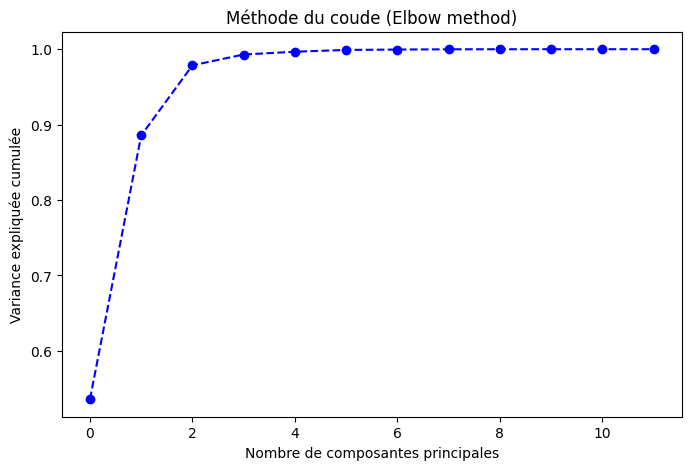

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(
    np.cumsum(explained_variance),
    marker='o', linestyle='--', color='b'
)
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Méthode du coude (Elbow method)")
plt.show()

<h4> 13)a- <u> Si on utilise 2 axes:ACP </u></h4>

In [50]:
X = datasets.drop(columns=["Class"])
y = datasets["Class"]


for column in X.columns:
    normalize_data(X, column)

# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.components_)

[[ 0.3467639   0.41345408  0.44049918  0.07451537  0.34419034  0.35497544
   0.17321839  0.01113637 -0.11086228 -0.25363713  0.28461458 -0.27746634]
 [ 0.2807995   0.11526075 -0.04009029  0.49203039  0.27813507  0.29027742
  -0.23350597  0.01879149  0.2153603   0.33963918 -0.38202181  0.37415465]]


<h4> i ) <u> interpretation de resultat: </u> </h4>


- Notre axes ici est de coordonnée: 
- PC1 = ( 0.3467639, 0.41345408,0.44049918, 0.07451537, 0.34419034, 0.35497544, 0.17321839, 0.01113637, -0.11086228, -0.25363713, 0.28461458, -0.27746634 ) et 
- PC2 = (0.280799,  0.11526075, -0.04009029, 0.49203039, 0.27813507 , 0.29027742, -0.23350597,  0.01879149,  0.2153603,  0.33963918, -0.38202181, 0.37415465)

<h4> ii) <u> Visualisation de resultat :</u></h4>

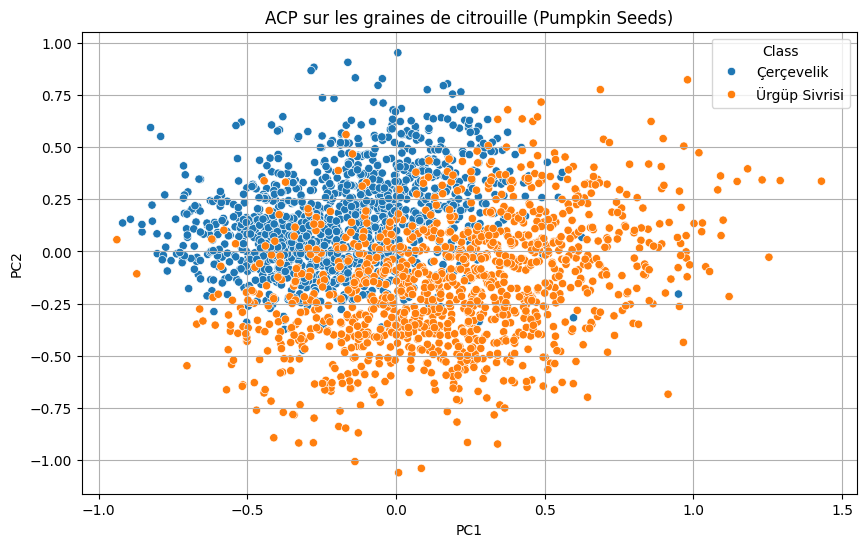

In [51]:


# Visualisation
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='tab10')
plt.title('ACP sur les graines de citrouille (Pumpkin Seeds)')
plt.grid()
plt.show()


<h4> 13)b-<u> Si on utilise 3 axes:ACP </u></h4>

In [52]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

pca_df_3 = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3']).dropna()
pca_df_3['Class'] = y.dropna()

print(pca_3.components_)

[[ 0.3467639   0.41345408  0.44049918  0.07451537  0.34419034  0.35497544
   0.17321839  0.01113637 -0.11086228 -0.25363713  0.28461458 -0.27746634]
 [ 0.2807995   0.11526075 -0.04009029  0.49203039  0.27813507  0.29027742
  -0.23350597  0.01879149  0.2153603   0.33963918 -0.38202181  0.37415465]
 [-0.0214012   0.01376721  0.06764787 -0.10603709 -0.02257899 -0.02081699
   0.0752803   0.01802602  0.96945016 -0.07602454  0.12902093 -0.11973887]]


<h4> i)<u> interpretation de resultat:</u></h4>


- Notre axes ici est de coordonnée: 
- PC1 = ( 0.3467639, 0.41345408,0.44049918, 0.07451537, 0.34419034, 0.35497544, 0.17321839, 0.01113637, -0.11086228, -0.25363713, 0.28461458, -0.27746634 ) ;
- PC2 = (0.280799,  0.11526075, -0.04009029, 0.49203039, 0.27813507 , 0.29027742, -0.23350597,  0.01879149,  0.2153603,  0.33963918, -0.38202181, 0.37415465) ,et
- PC3 = (-0.0214012, 0.01376721, 0.06764787, -0.10603709, -0.02257899, -0.02081699, 0.0752803, 0.01802602, 0.96945016, -0.07602454, 0.12902093, -0.11973887)

<h4> ii)<u> Visualisation de resultat:</u></h4>

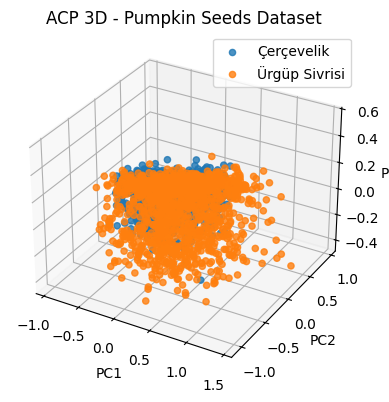

In [53]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
# Mapper les couleurs selon la classe
classes = pca_df_3['Class'].unique()
colors = sns.color_palette("tab10", len(classes))
for cls, color in zip(classes, colors):
    indices = pca_df_3['Class'] == cls
    ax.scatter(
        pca_df_3.loc[indices, 'PC1'],
        pca_df_3.loc[indices, 'PC2'],
        pca_df_3.loc[indices, 'PC3'],
        label=cls,
        color=color,
        s=20,
        alpha=0.8
    )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('ACP 3D - Pumpkin Seeds Dataset')
ax.legend()
plt.tight_layout()
plt.show()

## Conclusion:

Ce projet d'analyse en composantes principales (ACP) sur le dataset des graines de citrouille a permis de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information. Les variables morphologiques telles que l'aire, le périmètre, et la longueur des axes montrent des corrélations fortes, ce qui justifie leur regroupement dans les premières composantes principales. L'ACP a également révélé des patterns intéressants dans la structure des données, facilitant la visualisation et la détection de similarités entre les différentes variétés de graines. Cette analyse pourrait être approfondie par une classification supervisée pour prédire les classes de graines based sur les composantes principales.